In [0]:
!pip install -U numpy statsmodels pyyaml plotly tensorflow art ipdb -q

In [2]:
!pip install -U dnntime

Requirement already up-to-date: dnntime in /usr/local/lib/python3.6/dist-packages (0.3.9.3)


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import numpy as np
import pandas as pd

In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# Spain Hourly Energy Demand, Generation, and Prices ###########################
# The shareable csv links
link = ""  # Save energy_dataset.csv into Google drive and copy its link here
fluff, id = link.split('=')
# print(id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id})
energy_csv = "energy_dataset.csv"
downloaded.GetContentFile(energy_csv)

# Config YAML file ###########################
link = ""  # Save colab_config.yaml into Google drive and copy its link here
fluff, id = link.split('=')
# print(id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id})
config_yaml = "colab_config.yaml"
downloaded.GetContentFile(config_yaml)

In [6]:
import dnntime

Importing Deep Time-Series v0.3.9.3. Execute package by calling dnntime.run(config) with your provided config YAML file.


 ____                        _                   ____   _   _  _   _ 
|  _ \  _   _  _ __   _ __  (_) _ __    __ _    |  _ \ | \ | || \ | |
| |_) || | | || '_ \ | '_ \ | || '_ \  / _` |   | | | ||  \| ||  \| |
|  _ < | |_| || | | || | | || || | | || (_| |   | |_| || |\  || |\  |
|_| \_\ \__,_||_| |_||_| |_||_||_| |_| \__, |   |____/ |_| \_||_| \_|
                                       |___/                         
 _    _                                           _            
| |_ (_) _ __ ___    ___         ___   ___  _ __ (_)  ___  ___ 
| __|| || '_ ` _ \  / _ \ _____ / __| / _ \| '__|| | / _ \/ __|
| |_ | || | | | | ||  __/|_____|\__ \|  __/| |   | ||  __/\__ \
 \__||_||_| |_| |_| \___|       |___/ \___||_|   |_| \___||___/
                                                               
                     _                                 
 _ __    __ _   ___ | | __  __ _   __ _   ___          
| '_ \  / _` | / __|| |/ / / _` | / _` | / _ \         
| |_) || (_| || (__ |   < | 

-------------------------------------------------------------------

    - Now loading data from filepath 'energy_dataset.csv' ...
    - File loaded successfully. Shape of dataset = (35064, 28)

--> Original data saved in data_dict[0) Original]. See head below:



    See tail below:





-------------------------------------------------------------------


-------------------------------------------------------------------

Set the dataset to univarate using target col of total load actual.

--> Univarate data saved in data_dict[1) Univarate]. See head below:



    See tail below:



Frequency has been set to H.

Begin initial cleaning of the extract dataset...
    - Sorted DateTimeIndex in asc order (just in case).
    - Checked that there are no duplicate times.
    - Added freq 'H' to DateTimeIndex.
    - Removed timezone by converting to UTC and then reshifting back. 
    - filled any NaN value via linear interpolation.

--> Clean data saved in data_dict[2) Clean]. See head below:



    See tail below:





-------------------------------------------------------------------


-------------------------------------------------------------------

Plot the entire time-series data:






-------------------------------------------------------------------


-------------------------------------------------------------------



    - Augmented Dickey-Fuller Test Results:

      ADF Test Statistic        -21.420316
      P-Value                     0.000000
      # Lags Used                52.000000
      # Observations Used     35011.000000
      Critical Value (1%)        -3.430537
      Critical Value (5%)        -2.861623
      Critical Value (10%)       -2.566814

Current data is stationary with 95.0% confidence interval.



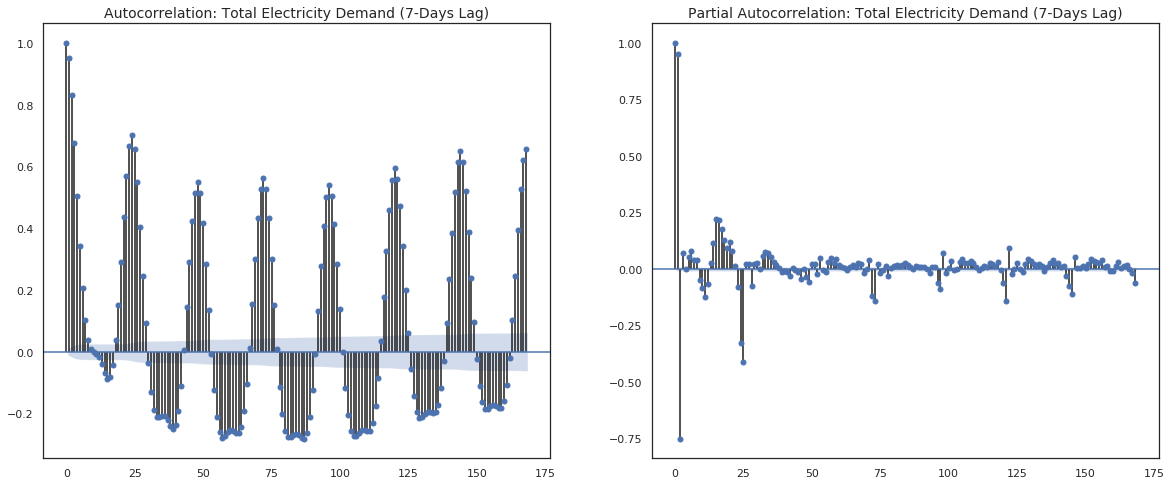

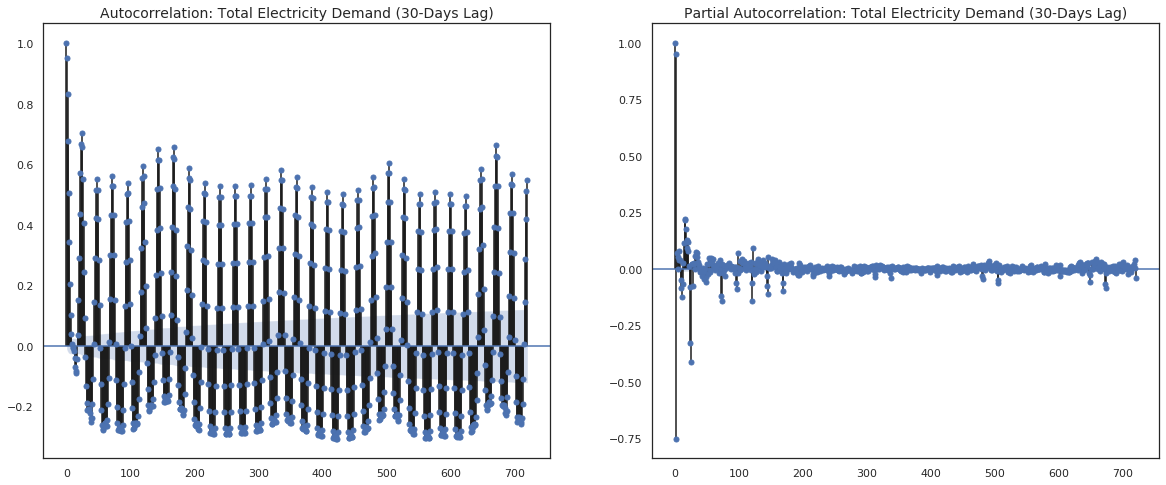




-------------------------------------------------------------------


-------------------------------------------------------------------




--> Box-Cox Standardized data saved in data_dict[3) Box-Cox Standardized]. See head below:



    See tail below:


INFO:numexpr.utils:NumExpr defaulting to 2 threads.



--> Deseasonalize data saved in data_dict[4) Deseasonalize]. See head below:



    See tail below:





-------------------------------------------------------------------


-------------------------------------------------------------------

Performing walk-forward validation.
Converted time-series into supervised leraning problem using walk-forward validation:
    Time-series frequency: 'H'.
    Input period: 336 timesteps, or 'bikweek'.
    Output (forecast) period: 24 timesteps, or 'day'.
    Original dataset: 35040 observations.
    Supervised dataset: 34681 observations.
    Training dataset: 33211 observations.
    Validation dataset: 336 observations, or 'biweek'.
    Testing dataset: 720 observations, or 'month'.

Split %:
Train: 95.76%, Val: 0.97%, Test: 2.08%, Gap: 1.19%

Dataset shapes:
    Original:
        data shape = (35040, 1)
    Supervised:
        X.shape = (34681, 336, 1)
        y.shape = (34681, 24)
        t.shape = (34681,)
    Training:
        X_train.shape = (33211, 336, 1)
        y_train.shape = (33211, 24)
        t_train.shape = (33211,)
    Validation:
        X_val.shape = (336, 336, 1)
        y_val.shape = (336, 24)
    

-------------------------------------------------------------------

GPU is enabled, running on GPU...


Stacked RNN model summary:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 336, 128)          16640     
_________________________________________________________________
dropout (Dropout)            (None, 336, 128)          0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 336, 128)          32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 336, 128)          0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                

Stacked LSTM model summary:
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 336, 128)          66560     
_________________________________________________________________
dropout_3 (Dropout)          (None, 336, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 336, 128)          131584    
_________________________________________________________________
dropout_4 (Dropout)          (None, 336, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)           

Stacked GRU model summary:
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 336, 128)          50304     
_________________________________________________________________
dropout_6 (Dropout)          (None, 336, 128)          0         
_________________________________________________________________
gru_1 (GRU)                  (None, 336, 128)          99072     
_________________________________________________________________
dropout_7 (Dropout)          (None, 336, 128)          0         
_________________________________________________________________
gru_2 (GRU)                  (None, 128)               99072     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)            

Stacked ConvLSTM model summary:
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d (ConvLSTM2D)    (None, 1, 22, 128)        198656    
_________________________________________________________________
flatten (Flatten)            (None, 2816)              0         
_________________________________________________________________
repeat_vector (RepeatVector) (None, 24, 2816)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 24, 128)           1507840   
_________________________________________________________________
time_distributed (TimeDistri (None, 24, 128)           16512     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 24, 128)           0         
_________________________________________________________________
time_distributed_2 (Ti

    3) GRU
    RMSE score: 0.4773

Total package runtime: 14.39 min


In [7]:
data_dict, model_dict = dnntime.run(config_yaml)

In [8]:
data_dict.keys()

dict_keys(['0) Original', '1) Univarate', '2) Clean', '3) Box-Cox Standardized', '4) Deseasonalize', '5) Make Supervised'])

In [9]:
data_dict['0) Original']

generation biomass  ...  price actual
time                                           ...              
2015-01-01 00:00:00+01:00               447.0  ...         65.41
2015-01-01 01:00:00+01:00               449.0  ...         64.92
2015-01-01 02:00:00+01:00               448.0  ...         64.48
2015-01-01 03:00:00+01:00               438.0  ...         59.32
2015-01-01 04:00:00+01:00               428.0  ...         56.04
...                                       ...  ...           ...
2018-12-31 19:00:00+01:00               297.0  ...         77.02
2018-12-31 20:00:00+01:00               296.0  ...         76.16
2018-12-31 21:00:00+01:00               292.0  ...         74.30
2018-12-31 22:00:00+01:00               293.0  ...         69.89
2018-12-31 23:00:00+01:00               290.0  ...         69.88

[35064 rows x 28 columns]

In [10]:
data_dict['1) Univarate']

total load actual
time                                        
2015-01-01 00:00:00+01:00            25385.0
2015-01-01 01:00:00+01:00            24382.0
2015-01-01 02:00:00+01:00            22734.0
2015-01-01 03:00:00+01:00            21286.0
2015-01-01 04:00:00+01:00            20264.0
...                                      ...
2018-12-31 19:00:00+01:00            30653.0
2018-12-31 20:00:00+01:00            29735.0
2018-12-31 21:00:00+01:00            28071.0
2018-12-31 22:00:00+01:00            25801.0
2018-12-31 23:00:00+01:00            24455.0

[35064 rows x 1 columns]

In [11]:
data_dict['2) Clean']

total load actual
2015-01-01 00:00:00            25385.0
2015-01-01 01:00:00            24382.0
2015-01-01 02:00:00            22734.0
2015-01-01 03:00:00            21286.0
2015-01-01 04:00:00            20264.0
...                                ...
2018-12-31 19:00:00            30653.0
2018-12-31 20:00:00            29735.0
2018-12-31 21:00:00            28071.0
2018-12-31 22:00:00            25801.0
2018-12-31 23:00:00            24455.0

[35064 rows x 1 columns]

In [12]:
type(model_dict)

collections.defaultdict

In [13]:
model_dict.keys()

dict_keys(['1) RNN', '2) LSTM', '3) GRU', '4) CONVLSTM'])

In [14]:
model_dict['2) LSTM']

{'forecast': array([[ 0.61983997,  0.5924921 ,  0.60593224, ...,  0.02499379,
          0.00996913, -0.1319665 ],
        [ 0.57209194,  0.56850815,  0.62378097, ..., -0.05190486,
         -0.09299529, -0.24277602],
        [ 0.5593737 ,  0.5904848 ,  0.67732495, ..., -0.14556813,
         -0.19304511, -0.32913435],
        ...,
        [-1.3912145 , -1.3661708 , -1.4184645 , ..., -0.15636864,
         -0.16454044, -0.13114229],
        [-1.1972986 , -1.23086   , -1.261708  , ..., -0.12509286,
         -0.15346777, -0.08049492],
        [-1.1320678 , -1.1895022 , -1.1883522 , ..., -0.06986997,
         -0.12501214, -0.02044277]], dtype=float32),
 'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7ff54d2ac9b0>,
 'rmse': 0.5465506300180514}

In [15]:
model_dict['4) CONVLSTM']

{'forecast': array([[[ 0.5708928 ],
         [ 0.5581337 ],
         [ 0.51858515],
         ...,
         [ 0.05365084],
         [ 0.05893714],
         [ 0.0632867 ]],
 
        [[ 0.56177896],
         [ 0.59169436],
         [ 0.60287184],
         ...,
         [ 0.05041352],
         [ 0.06200961],
         [ 0.07205139]],
 
        [[ 0.5827437 ],
         [ 0.67696655],
         [ 0.7298554 ],
         ...,
         [ 0.01172541],
         [ 0.01982394],
         [ 0.02656257]],
 
        ...,
 
        [[-1.1732312 ],
         [-1.1326379 ],
         [-0.9720367 ],
         ...,
         [-1.0073708 ],
         [-1.2253253 ],
         [-1.4362929 ]],
 
        [[-1.0368234 ],
         [-1.000665  ],
         [-0.8539481 ],
         ...,
         [-1.4536321 ],
         [-1.6686534 ],
         [-1.8819315 ]],
 
        [[-0.9932744 ],
         [-0.99125284],
         [-0.8599809 ],
         ...,
         [-1.5046219 ],
         [-1.7207891 ],
         [-1.9292597 ]]], dtype=fl